### FacetGrid: Seaborn

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
penguins.shape

(344, 7)

### Intro Visuals

#### Basics

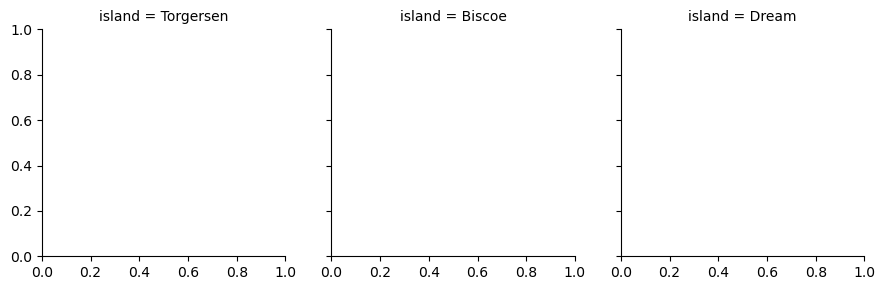

In [11]:
sns.FacetGrid(penguins, col="island")  #separating three different columns 

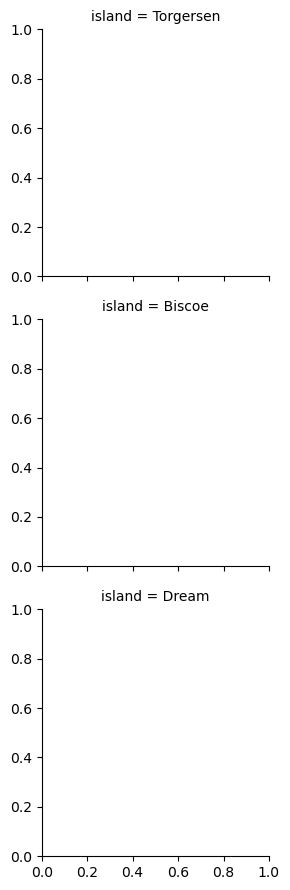

In [12]:
sns.FacetGrid(penguins, row="island")

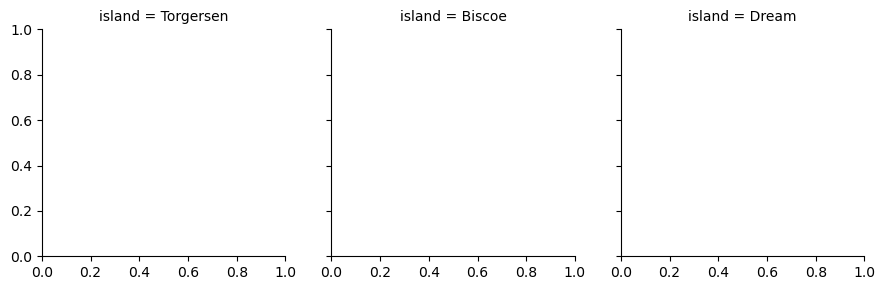

In [13]:
g = sns.FacetGrid(data=penguins, col="island");

In [14]:
type(g)

seaborn.axisgrid.FacetGrid

### .map()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


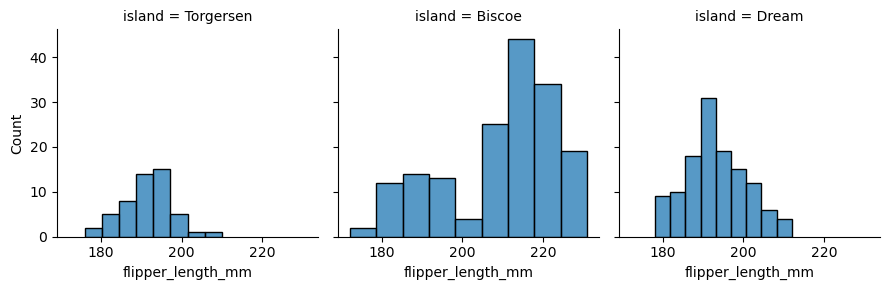

In [18]:
g = sns.FacetGrid(penguins, col="island")
g.map(sns.histplot, "flipper_length_mm" )

### .map_DataFrame()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


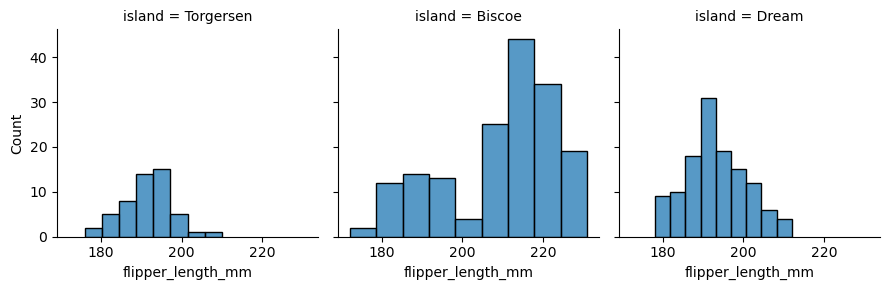

In [22]:
g = sns.FacetGrid(penguins, col="island")
g.map_dataframe(sns.histplot, x="flipper_length_mm")

# g.map_dataframe(sns.histplot, y="flipper_length_mm")

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444459, 'Bill length')

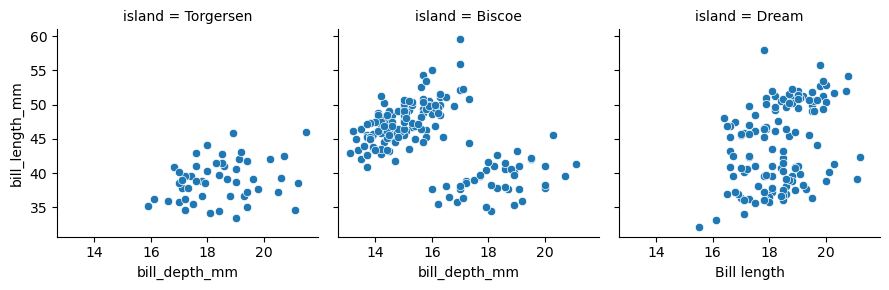

In [29]:
g = sns.FacetGrid(penguins, col="island")
g.map_dataframe(sns.scatterplot, x="bill_depth_mm", y="bill_length_mm")



### Methods and Attributes

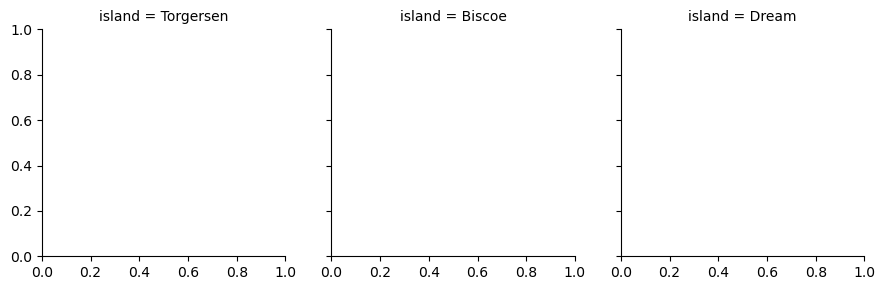

In [31]:
g = sns.FacetGrid(penguins, col="island")

In [32]:
type(g)

seaborn.axisgrid.FacetGrid

### .set_axis_labels()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


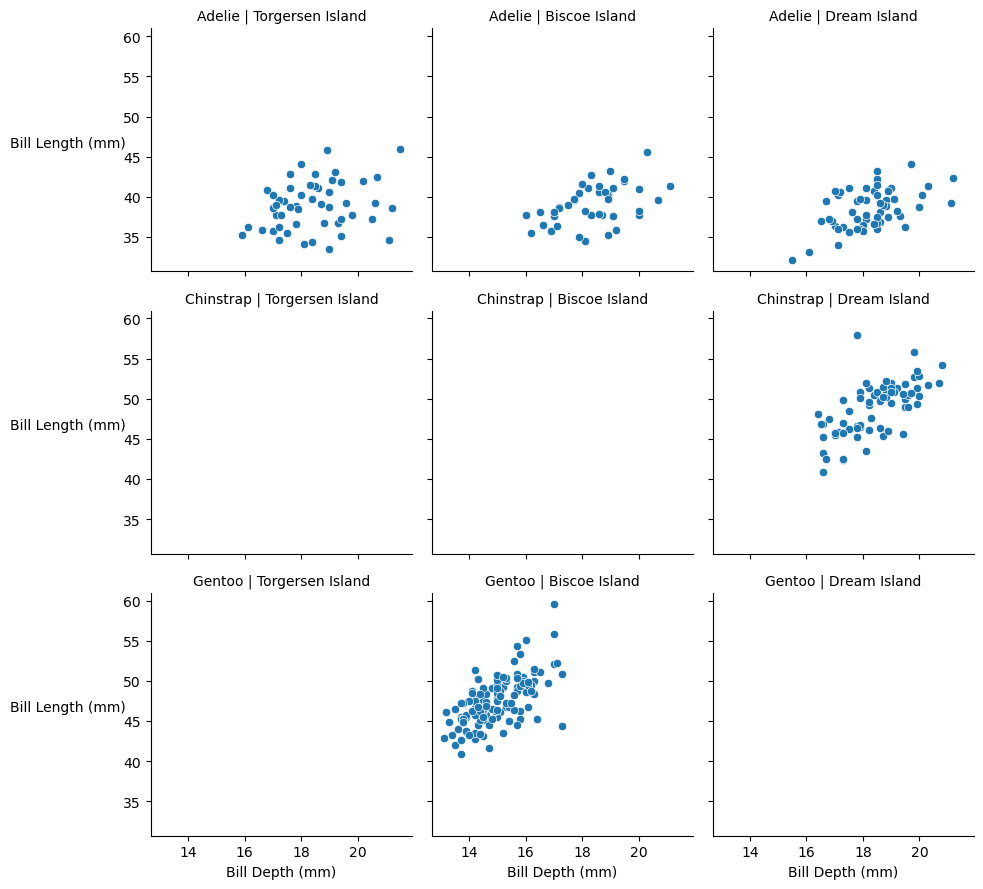

In [45]:
g = sns.FacetGrid(penguins, col="island", row="species")

g.map_dataframe(sns.scatterplot, x="bill_depth_mm", y="bill_length_mm")
g.set_axis_labels("Bill Depth (mm)", "Bill Length (mm)")

g.set_ylabels("Bill Length (mm)", labelpad=40, rotation=0)
g.set_titles(col_template = "{col_name} Island", row_template = "{row_name}");

### sharey, ylim

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


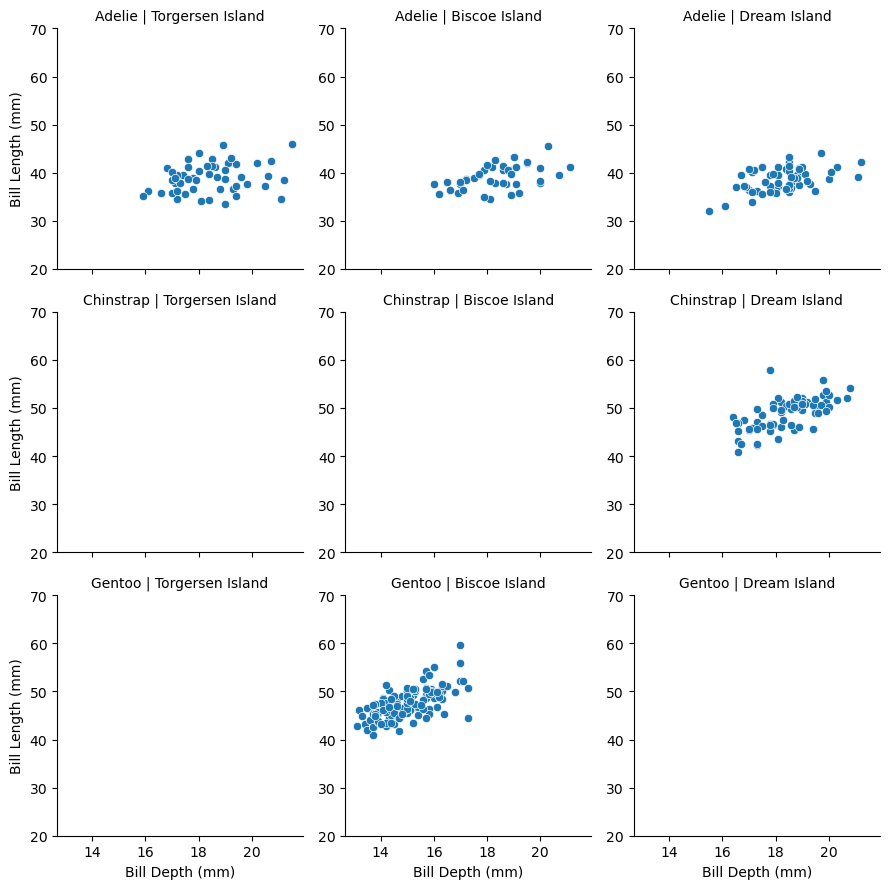

In [53]:
g = sns.FacetGrid(penguins, col="island", row="species", sharey=False, ylim=(20, 70))

g.map_dataframe(sns.scatterplot, x="bill_depth_mm", y="bill_length_mm")
g.set_axis_labels("Bill Depth (mm)", "Bill Length (mm)")
g.set_titles(col_template = "{col_name} Island", row_template = "{row_name}")

### Hue and Custom Functions

#### hue

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


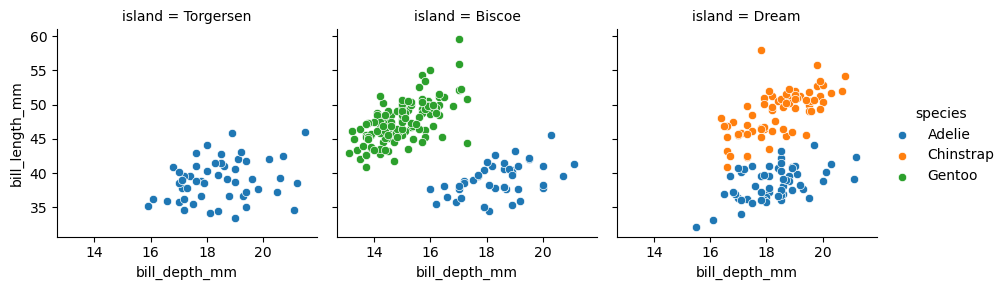

In [58]:
g = sns.FacetGrid(penguins, col="island", hue="species")

g.map_dataframe(sns.scatterplot, x="bill_depth_mm", y="bill_length_mm")
g.add_legend();

### palette

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


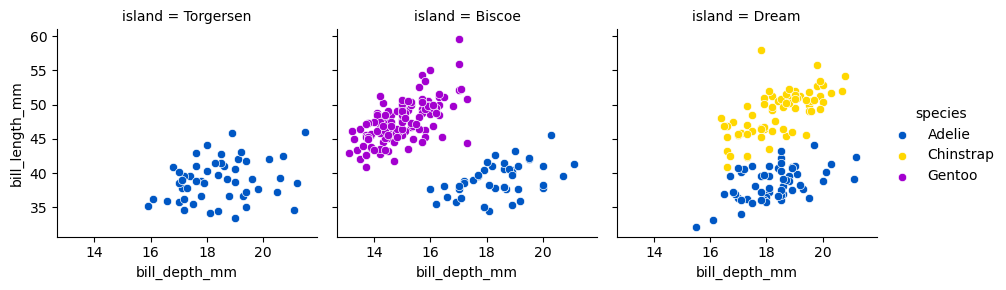

In [59]:
g=sns.FacetGrid(data=penguins, col="island", hue="species", palette="prism")

g.map_dataframe(sns.scatterplot, x="bill_depth_mm", y="bill_length_mm")
g.add_legend();

### Custom Functions

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def add_mean_line(data, var=None, **kws):
    # If no variable provided, skip adding mean line
    if var is None:
        return
    
    # Calculate mean for the specified variable
    m = np.mean(data[var])
    
    # Get current axis
    ax = plt.gca()
    
    # Add line at group mean
    ax.axvline(m, color="maroon", lw=3, ls="--")
    
    # Annotate group mean
    x_pos = 0.65
    if m > 5000:
        x_pos = 0.2
    ax.text(x_pos, 0.7, f"mean={m:.0f}",
            transform=ax.transAxes,  # Transforms positions to range from (0,0) to (1,1)
            color="maroon", fontweight="bold", fontsize=12)

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


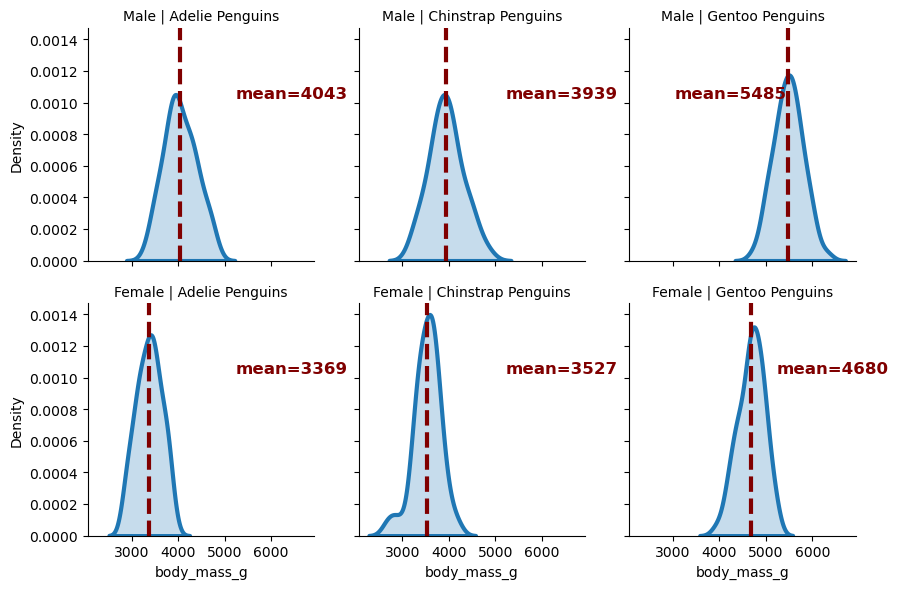

In [74]:
quantity="body_mass_g"

g = sns.FacetGrid(penguins, row="sex", col="species")
g.map_dataframe(sns.kdeplot, x=quantity, lw=3, fill=True)
g.map_dataframe(add_mean_line, var=quantity)
g.set_titles(row_template="{row_name}", col_template="{col_name} Penguins");